
# MAA209 Numerical Optimization - Final Evaluation 2022


In [3]:
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

from scipy.optimize import fsolve
from scipy.optimize import linprog
import scipy
from matplotlib import ticker
%matplotlib inline

# Theoretical Questions

#### Question 1




#### Question 2

Newton's algorithm doesn't converge to the global minimum $x^*$ for all initilization. From the lecture we know that Newton's algorithm does not converge for all initializations that are far from the solution. Exemple 1.2 second case illustrate this case.
Nevertheless, as long as $f$ is piecewise $C^1$ (or more), the GD method with Wolfe's line search would always converge to the global minimum for any initialization. In this case, the condition is fulfiled thanks to the convexity of the function.


#### Question 3
    
a. The main drawback of the gradient descent method applied in higher dimensions is the fact that the speed of convergence is directly influenced by the condition number of the function. For example if this number is very large, the the functions is ill-conditioned' and the convergence will be very slow.

b. Since the gradients components are of distant orders, this fuction is considered poorly or ill-conditioned. In this case, the gradient descent algorithm willnot work well for this function.

c. The condition number of the matrix A is the ratio of $\lambda_{max}$ over $\lambda_{min}$ of A $\frac{2000}{0,01} = 200,000$ . In this case, since the function is convex, the GD will converge toward the unique minimum of $f$ for any initialisation. However, the speed of convergence will be very slow since the condition number is large and the function is ill-conditioned.


#### Question 4

 Newton's method is not an efficient way to minimize $f$. This method demand a very heavy and hard computation of the inverse of the hessian matrix of size $100k*100k$. Another inconvenience is the fact that the Hessian matrix is also full means that we will require a lot of storage to hold the matrix in memory.


#### Question 5

a. For each element in the result $Ax$, we need around $O(n) $ operations to compute all elements. 
We also need $ O(n)$ operations at each new iteration.
In total, we need  $ O(n^2)$ operations to use CG algorithm to solve this problem. That is to say the CG has a complexity of $ O(10^{12})$

b. If A has 100 disctinct eigenvalues, and according to the theoretical results shown in the course, the CG algorithm is garanted to converge at 100 iterations if not before.


#### Question 6


Since the gradients of the functions are linearly independent at all point, the constraints are well-defined, 𝑓 is strictly convex and continuously differentiable everywhere then this problem has a solution. 
We can write the optimality conditions given by the Lagrange multipliers:

 $ \nabla f(x^*) = \alpha \nabla g_1 (x^*) + \beta \nabla g_2(x^*) $

$ (2x^*, 2y^*, 2z^*) = \alpha (2,3,-1) + \beta(5,-1,1) $


#### Question 7

Since $g_1(0,0) = g_2(0,0) = -1 \leq 0$, we can conclude that the optimal/global minimum of the function $f(x,y) = x^2 + y^2$ is $(0,0)$. 
We have that $\nabla f(x,y) = (2x,2y)$ that is to say $\nabla f(0,0)=0$ , which means that the optimality conditions for this problem corresponds to $\nabla f(0,0) = 0*\nabla g_1(0,0) + 0* \nabla g_2(0,0) = 0 $.


#### Question 8

## Problem 1: Unconstrained and Constrained optimization
### PartA:Global optimization of an oscillating function

 
#### Question 1

Since $f$ is continuous and smooth on  $\mathbb{R}^2$ and goes to $\infty$ as $(x,y)\rightarrow \infty$ and it is bounded from below ;  $f(x,y) \geq -4$ for any $(x,y) \in \mathbb{R}^2$, this is sufficient to show that $f$ admits a global minimizers on $\mathbb{R}^2$.

#### Question 2

For all $(x,y)$ outside $[-4,4]^2$, we have that $ \frac{x^2+y^2}{4} + e^{\sin(50x)} \geq 4 $ and we have $\sin(60e^y) + \sin(70\sin(x)) + \sin(\sin(80y)) - \sin(10(x+y)) \geq -4 $ we got $ f(x,y) \geq 0$.  But $f$ takes values smaller than 0. Thus the minimizer is in  $[-4,4]^2$.

In [4]:
##Question3. Plot of the function values in the restrained area 


# the function : 

def func(x,y):
    return np.exp(np.sin(50*x)) + np.sin(60*np.exp(y)) + np.sin(70*np.sin(x)) + np.sin(np.sin(80*y)) - np.sin(10*(x+y)) + ((x**2 + y**2)/4)

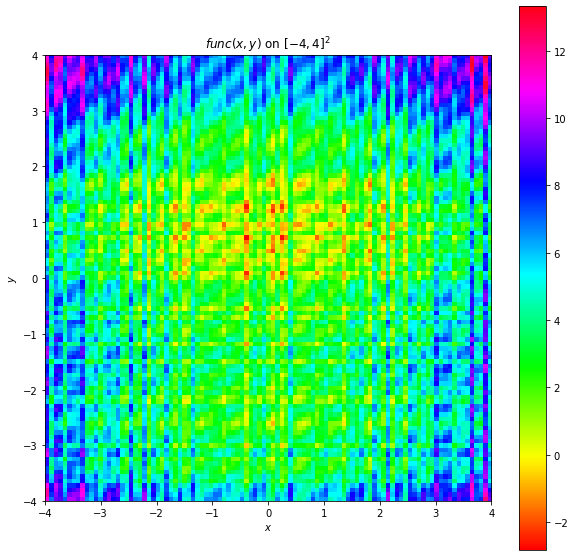

<ipython-input-54-a0cd516e6a5a>:23: UserWarning: The following kwargs were not used by contour: 'level'
  plt.contour(X,Y,V, level = 24)


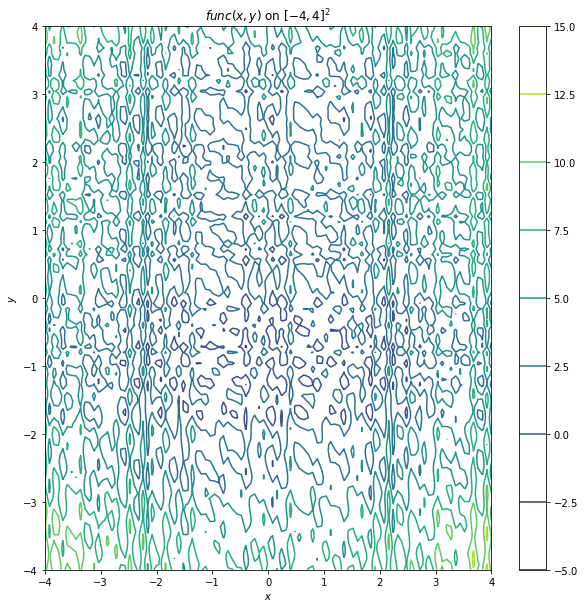

In [54]:
# vectors array in the restrained area
X = np.linspace(-4, 4, 101)
Y = np.linspace(-4, 4, 101)

# values of the fct in [-4,4]^2 
V = np.array([[func(x,y) for x in X] for y in Y])


#Plot using plt.imshow to have a 2d plot of f and be able to 
#distinguish the dispersion of minimizers 

plt.figure(figsize=(10,10))

plt.imshow(V, extent = [-4, 4, -4, 4], cmap="hsv")
plt.colorbar()
plt.axis();
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("$func(x,y)$ on $[-4,4]^2$", fontsize=12)
plt.show()

plt.figure(figsize=(10,10))
plt.contour(X,Y,V, level = 24)
plt.colorbar()
plt.axis();
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("$func(x,y)$ on $[-4,4]^2$", fontsize=12)
plt.show()


#### Comment

In the graph above we observe a 2D draw of the function we wish to minimize. Thanks to the colorbar, we can see that the function admits many mimimums coloured in red. The dispersion of the red dots can be restrained in the region $[-3,3]^2$. This restriction is more precise than the previous one. 

#### Question 4

The terms that generate oscillatory behaviors are the sinusoidal terms $ e^{\sin(50x)} + \sin(60e^y) + \sin(70\sin(x)) + \sin(\sin(80y)) - \sin(10(x+y))$. In the plot above, if we modify the func() function by removing exp() and the polynomial, we see directly a change in the behavior of the function, it directly adopts a oscillatory behavior. Whereas if we remove the sin terms, we can see that the oscialltory behavior is less and less remarkable.

In [4]:
##Question 5 
# For each N = 2**k,  we define a NxN grid in the region [-4,4]^2
## and minimize function on this grid
for k in range(4,11):
    N = 2**k
    X = np.linspace(-4,4,N+1)
    Y = np.linspace(-4,4,N+1)
    
    # Compute values of f at all points 
    V = np.array([[func(x,y) for x in X] for y in Y])
 
    #minimum value : 

    ind = np.unravel_index(np.argmin(V, axis=None), V.shape)   
    x = ind[1]
    y = ind[0]
    #print(ind)
    
    #printed message: 
    print(f"for N={N}, the minimum value of function is func({X[x]}, {Y[y]})={V[ind]}")
    

for N=16, the minimum value of function is func(-0.5, -0.5)=-1.7612874733047068
for N=32, the minimum value of function is func(1.25, -0.5)=-1.8463465039832796
for N=64, the minimum value of function is func(1.25, -0.5)=-1.8463465039832796
for N=128, the minimum value of function is func(0.0625, -0.5)=-2.449624019189007
for N=256, the minimum value of function is func(0.34375, -0.09375)=-2.943575583284294
for N=512, the minimum value of function is func(-0.390625, -0.09375)=-3.163951672593782
for N=1024, the minimum value of function is func(-0.0234375, 0.2109375)=-3.303518906855208


In [28]:
def df(x,y):
    """
    Function to compute the gradient of f, required by gradient algorithms.
    """
    dfx = np.exp(np.sin(50*x))*np.cos(50*x)*50 + np.cos(70*np.sin(x))*70*np.cos(x) - 10*np.cos(10*(x+y)) + (x/2.0)
    dfy = np.cos(60*np.exp(y))*60*np.exp(y) + np.cos(np.sin(80*y))*np.cos(80*y)*80 - 10*np.cos(10*(x+y)) + (y/2.0)
    return np.array([dfx,dfy])

In [31]:
def GDlinesearch(f,df,x0,tol,maxiter,m1,m2):
    """
    Gradient descent with line search algorithm
    As implemented in TDs.
    """
    
    phist = []
    vhist = []
    ghist = []
    phist.append(x0)            # Create an array which holds the optimization history
 
    val = f(x0[0],x0[1])
    gd   = df(x0[0], x0[1])
    #print(x0,gd)
    vhist.append(val)
    ghist.append(gd)
    iter = 0
    step = 0.001
    prevval = val
    d = gd

    while abs(np.linalg.norm(gd))>=tol: 
        iter += 1

        #Line search
        tl=0
        tr=0
        t=1
        step=t
        d = -gd
        #print("d:",d)
        
        while (True):
            x= x0 +t*d
            qt = f(x[0],x[1])
            qp = np.dot(gd,d)
           
            #print(val)
           
            if ((qt-val)/t<=(m1*qp)) and ((qt-val)/t>=(m2*qp)):
                step=t   # we found a good step
                break
            if ((qt-val)/t>(m1*qp)):
                # step too big
                tr = t
            if ((qt-val)/t<(m2*qp)):
                # step too small
                tl = t
            if(tr==0):
                t = 2*tl
            else:
                t = 0.5*(tl+tr)
            if abs(tr-tl)<1e-15*tr or tr<1e-15:
                break
        #print("step:", step)
        x0 = x0 + step*d
        val = f(x0[0],x0[1])
        gd  = df(x0[0], x0[1])
        #print('sol:',x0,"grad:", gd)
        #if(iter%10000==0):
        #    print("Iter: ",iter,"| Val: ",val,"| Step: ",step," Grad: ",np.linalg.norm(gd))
        phist.append(x0)
        vhist.append(val)
        ghist.append(d)
        if(iter>maxiter):
            print('Maximum number of iterations reached!')
            break
        #if(abs(val-prevval)<Tol):
            #print('Function does not decrease enough!')
            #break
        prevval = val
    if(np.linalg.norm(d)<tol): 
        print('Algorithm converged!')
    return phist,vhist,ghist,val

In [33]:
m1 = 0.1
m2 = 0.9
tol = 1e-7
maxiter = 10000 

for k in range(4,11):
    N = 2**k
    X = np.linspace(-4,4,N+1)
    Y = np.linspace(-4,4,N+1)
    
    # Compute values of f at all points 
    V = np.array([[func(x,y) for x in X] for y in Y])
 
    #minimum value : 

    ind = np.unravel_index(np.argmin(V, axis=None), V.shape)   
    x = ind[1]
    y = ind[0]
    #print(ind)
    
    # x0 : 
    x0= np.array([X[x],Y[y]])
    
    # GD with line search starting from x_0 determined with k = 10 
    phist, vhist, ghist, val = GDlinesearch(func, df, x0, tol, maxiter, m1, m2)
    print()
    print(f"The final optimum founded with initialisation {x0} corresponding to {N}=2^{k} is {val} reached at {phist[-1]}")


The final optimum founded with initialisation [-0.5 -0.5] corresponding to 16=2^4 is -2.905187040207685 reached at [-0.39453169 -0.72118704]

The final optimum founded with initialisation [ 1.25 -0.5 ] corresponding to 32=2^5 is -1.963775509525912 reached at [ 1.24489051 -0.4944142 ]

The final optimum founded with initialisation [ 1.25 -0.5 ] corresponding to 64=2^6 is -1.963775509525912 reached at [ 1.24489051 -0.4944142 ]

The final optimum founded with initialisation [ 0.0625 -0.5   ] corresponding to 128=2^7 is -2.845007680147015 reached at [ 0.07230403 -0.49590792]

The final optimum founded with initialisation [ 0.34375 -0.09375] corresponding to 256=2^8 is -2.952578091294447 reached at [ 0.34217879 -0.0945754 ]

The final optimum founded with initialisation [-0.390625 -0.09375 ] corresponding to 512=2^9 is -3.2081391295346244 reached at [-0.39452579 -0.09320015]

The final optimum founded with initialisation [-0.0234375  0.2109375] corresponding to 1024=2^10 is -3.306868647475

#### Comment 

The GD with line search algorithm finds a minimum at the point $(-0.02440308, 0.21061243)$ which is close to our initialization $x_0$ in the grid $1024 \times 1024$ where the function attains the minimum value $-3.3068686474752367$.


#### Question7

For $k = 4$, the algorithm seems to converge to the minimum $-2.905187040207685$ at the point $[-0.39453169 -0.72118704]$.

For $k\in {5,6}$, the algorithm seems to converge to the minimum $-1.963775509525912$ at the point $[ 1.24489051 -0.4944142 ]$.

For $k = 7$, the algorithm seems to converge to the minimum $-2.845007680147015$ at the point $[ 0.07230403 -0.49590792]$.

For $k = 8$, the algorithm seems to converge to the minimum $-2.952578091294447$ at the point $(0.34217879 -0.0945754)$.

For $k = 9$, the algorithm seems to converge to the minimum $-3.2081391295346244$ at the point $[-0.39452579 -0.09320015]$.

For $k = 10$, the algorithm seems to converge to the minimum $-3.3068686474752367$ at the point $[-0.02440308  0.21061243]$.
   
 We conclude that the function has distincts minimums values reached at different points.
   
#### Question8

In particular, we can assume that the one reached at $N$ corresponding $k=10$ is the global minima of $f$ in $\mathbb{R}^2$ . 
To support our claim, we tested the algorithm starting for different initialization corresponding to points where the function has a small value and for different grid cuts and we did not obtain a better minimisation. 

Neverthless, for a function with such oscillatory behavior, it is still hard to found precisely the global minimizer.

#### Question9 

### Part B – Constrained optimization

#### Question 10

**Convexity of $K_1$**


We remark that if $x$ or $y$ is zero it is not in $K_1$, so we need $x,y\in(0,\infty)$ in order to be in $K_1$ .
Let consider $(x_{1},y_{1}),(x_2,y_2 )\in(K_1)$ and $t\in(0,1)$. We then have:

$$ t(x_1,y_1)+(1-t)(x_2,y_2)=(tx_1+(1-t)x_2,ty_1+(1-t)y_2)$$

Thus,

$$
(tx_1+(1-t)x_2)(ty_1+(1-t)y_2)\geq t^2x_1y_1+(1-t)^2x_2y_2+t(1-t)(x_1y_2+x_2y_1)  \\
\geq t^2+(1-t)^2+2t(1-t)\sqrt{x_1y_2x_2y_1}  \\
\geq t^2+(1-t)^2+2t(1-t)  \\
\geq(1-t + t)^2 =1
$$

This new point is indeed in $K_1$. 
We conclude that $K_1$ is convex. 


**Convexity of $K_2$**
    
let consider $(x_{1},y_{1}),(x_2,y_2 )\in(K_2)$ and $t\in(0,1)$. We then have in the same way as before:



$$(ty_1+(1-t)y_2)\leq t(1+x_1)+(1-t)(1+x_2) 
\leq tx_1+(1-t)x_2+1
$$

this verifies the first condition. 

$$
(ty_1+(1-t)y_2)\geq t(2-x_1)+(1-t)(2-x_2) 
\geq 2-(tx_1+(1-t)x_2)
$$

this verifies the second condition. 

Thus the point belongs to the set. We conclude that $K_2$ is convex. 


**Cloture of $J$**


We can intuitively see that both sets are closed because any convergent sequence of points in the set has its limit in the set. 


**Convexity of J**

We take $t\in(0,1)$ and $(x_1,y_1)$, $(x_2,y_2)$ both in $(0,\infty)^2$. Then

$$
J(t(x_1,y_1)+(1-t)(x_2,y_2))=J(tx_1+(1-t)x_2,ty_1+(1-t)y_2) \\
=\cosh(4(tx_1+(1-t)x_2)+ty_1+(1-t)y_2) \\
=\cosh(t(4x_1+y_1)+(1-t)(4x_2+y_2)) \\
\leq t\cosh(4x_1+y_1)+(1-t)\cosh(4x_2+y_2) \\ 
\leq tJ(x_1,y_1)+(1-t)J(x_2,y_2)
$$

Thanks to the convexity of $\cosh$, we conclude that $J$ is convex. 


**Minimizers's existence**

As $J$ is convex and two other sets convex and closed, then $J$ admits minimizers in each of the two sets. 

In [41]:
#### Question 11
### plot of $J$ on the sets $K_1$  and $K_2$

def J(xarr):
    """Function J"""
    #print(xarr)
    return np.cosh(4*xarr[0]+xarr[1])

def GradJ(xarr):
    """Gradient of J"""
    return np.array([4*np.sinh(4*xarr[0]+xarr[1]),np.sinh(4*xarr[0]+xarr[1])])

def G(xarr):
    """Function defining gboundaries"""
    if variant == 1:
        return (xarr[0] * xarr[1]) - 1
    if variant == 2:
        return max(xarr[1]-xarr[0]-1, 2-xarr[0]-xarr[1])

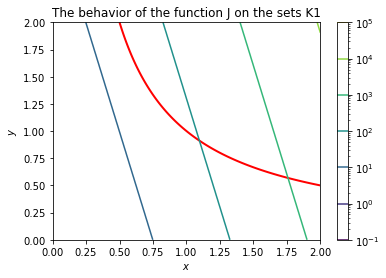

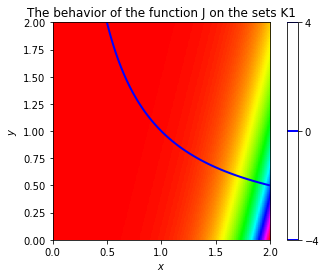

In [67]:
## plot of $J$ on the sets $K_1$ 

variant = 1


plt.figure()
X=np.linspace(0,2,100)
Y =np.linspace(0,2,100)
##The value of J 
V=np.array([[J(np.array([x,y])) for x in X] for y in Y])
##The values at the boundaries K1
VG=np.array([[G(np.array([x,y])) for x in X] for y in Y])


plt.contour(X,Y,VG,levels=0,colors='r',linewidths=2)  ## Draw of the condition set boundaries 

plt.contour(X,Y,V,locator=ticker.LogLocator())      # For log contour lines

#plt.contour(xarr,yarr,V)                               # For linear contour lines

plt.title("The behavior of the function J on the sets K1")
plt.axis()
plt.colorbar()
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("The behavior of the function J on the sets K1", fontsize=12)
plt.show();

plt.imshow(V, extent = [0, 2, 0, 2], cmap="hsv")
plt.contour(X,Y,VG,levels=0,colors='b',linewidths=2) 
plt.axis("scaled")
plt.colorbar()
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("The behavior of the function J on the sets K1", fontsize=12)
plt.show();

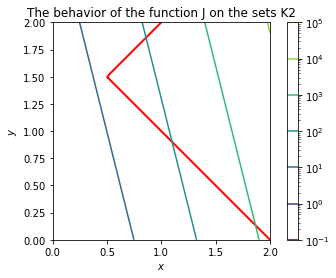

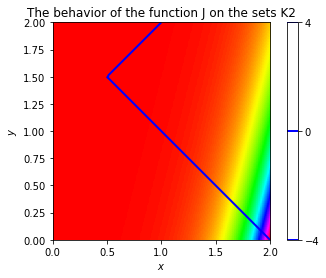

In [68]:
## plot of $J$ on the sets $K_2$ 


variant = 2

plt.figure()
X=np.linspace(0,2,100)
Y =np.linspace(0,2,100)

##The values of J
V=np.array([[J(np.array([x,y])) for x in X] for y in Y])

##The values at the boundaries K2
VG=np.array([[G(np.array([x,y])) for x in X] for y in Y])


plt.contour(X,Y,VG,levels=0,colors='r',linewidths=2)
plt.contour(X,Y,V,locator=ticker.LogLocator())      # For log contour lines
#plt.contour(aX0,aX1,Z,locator=ticker.LogLocator())    # For linear contour lines
plt.axis('scaled')
plt.colorbar()
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("The behavior of the function J on the sets K2", fontsize=12)
plt.show();

plt.imshow(V, extent = [0, 2, 0, 2], cmap="hsv")
plt.contour(X,Y,VG,levels=0,colors='b',linewidths=2) 
plt.axis("scaled")
plt.colorbar()
plt.xlabel("$x$", fontsize=10)
plt.ylabel("$y$", fontsize=10)
plt.title("The behavior of the function J on the sets K2", fontsize=12)
plt.show();

**COMMENT** 

According to the 2 graphs plotted above, we can see that:
- the minimizers of $K_2$ belongs to the intersection of two lines representing the two inequalities $(0.5,1.5)$
- the minimizer of $K_1$ should belong to the boundary set and it should tends to 0.

#### Question 12


Let us compute the projection operator $P_{K_1}$ on the set $K_1$ such that : 

$$ P_{K_1}(y)=\min_{x\in K_1}|x-y|$$

We know that for all the points in $K_1$, the projection is the point itself because in this case the distance is 0 . Otherwise, it is its projection on the boundary of $K_1$. The boundary set of $K_1$ can be written as $(a,\frac{1}{a})$, $a\in(0,\infty)$. Analytically, and after solving the first derivative equal to 0 , we found that inorder for a to be a solution, it should verifies the following condition : 

$$a^4-xa^3+ya-1=0$$


In [73]:
##NUMERICALLY :

In [74]:
def equation(a, xarr):   
    """the equation that we want to optimise"""
    x = xarr[0]
    y = xarr[1]
    return (a**4)-x*(a**3)+(y*a)-1

def projK1(xarr):  
    """Compute the projection of x onto the set K1"""
    if xarr[0]*xarr[1] >= 1:
        return xarr
    a = fsolve(equation, 1, args= xarr)
    return np.array([a, 1/a])

Has the algorithm converged ? :  True
Numerical solution is: 
 [[0.50000082]
 [1.9999967 ]]


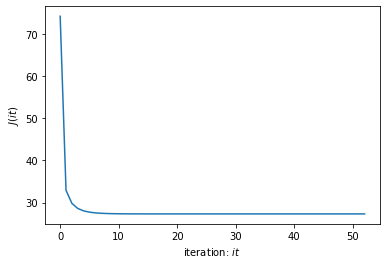

In [75]:
#Since we used in part A GD with line-search, we can change and use GD with fixed step this time.
def gradientFixedStep(f,df,proj,x_init,step=1e-02,tol=1e-06,maxiter=200):
    """Classic GD with Fixed Step implementation lifted from tutorials"""
    # initialization
    x=x_init.copy()
    #print(x)
    x=proj(x)
    #print(x)
    xtab=[]
    ftab=[]
    xtab.append(x) # add x to the list xtab
    #print(x)
    fval = f(x)
    pval = fval
    ftab.append(fval)
    it=0 # iteration count
    while((it==0) or (it<maxiter and np.linalg.norm(xtab[-1]-xtab[-2])>tol)):
        x=proj(x-step*df(x))
        xtab.append(x)
        fval=f(x)
        ftab.append(fval)
        it=it+1
    # boolean to indicate the convergence
    if(it==maxiter):
        conv = False
    else:
        conv = True
    return xtab, ftab, conv


variant = 1
x0 = np.array([1, 1])
xtab,ftab,conv = gradientFixedStep(J,GradJ,projK1,x0, step=1e-02)



print('Has the algorithm converged ? : ',conv)
print("Numerical solution is: \n", xtab[-1])
plt.figure()
plt.plot(ftab)
plt.xlabel('iteration: $it$')
plt.ylabel('$J(it)$')
plt.show()

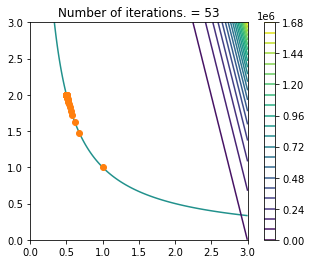

In [76]:
plt.figure()

X = np.linspace(0,3,100)
Y =np.linspace(0,3,100)

##The values of J 
V=np.array([[J(np.array([x,y])) for x in X] for y in Y])

##The values at the boundaries K!
VG=np.array([[G(np.array([x,y])) for x in X] for y in Y])

plt.contour(X,Y,VG,0)
plt.contour(X,Y,V,25)


X0=[X[0] for X in xtab]
X1=[X[1] for X in xtab]
plt.plot(x0[0],x0[1])

plt.plot(X0,X1,"o")
plt.title('Number of iterations. = '+str(np.shape(X0)[0]))
plt.axis('scaled')
plt.colorbar()
plt.show()

**Conclusion:** 
We see clearly that the algorithm converge to the numerical solution.

#### Question 13
 
We want to show that the minimizer also works for the function $J_2$ on the two sets. 

Using the fact that $\cosh$ is strictly convex, we can conclude that :

$$\min_{(x,y)\in\mathbb{K_{i}}^2}\cosh(4x+y)=\min_{(x,y)\in\mathbb{K_{i}}^2}4x+y$$ for $i\in{1,2}$

We can solve this linear problem in the following cell codes. 

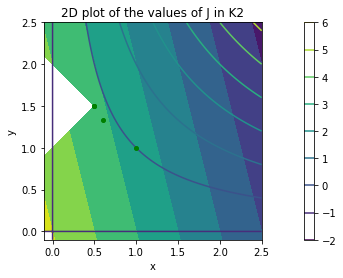

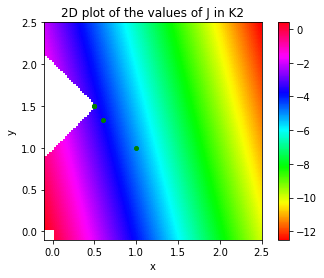


 We can see that the algorithm converges indeed to the solution : [0.5 1.5]


In [107]:
plt.figure()  
    
X=np.linspace(-0.1,2.5,100)
Y=np.linspace(-0.1,2.5,100)

V=-np.array([[J(np.array([x,y])) for x in X] for y in Y])
VG = np.array([[G(np.array([x,y])) for x in X] for y in Y])

plt.contourf(X,Y,V)
plt.contour(X,Y,VG)
plt.colorbar()
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')
plt.title("2D plot of the values of J in K2")


def callbackF(arg):
    x = arg.x
    plt.plot(x[0],x[1],'.g',markersize=8)

res = linprog(coeff,A_ub=A,b_ub=b,callback=callbackF)
plt.show()

##Second option 
plt.imshow(V, extent = [-0.1, 2.5,-0.1, 2.5],origin = "lower", cmap="hsv")
plt.colorbar()
res = linprog(coeff,A_ub=A,b_ub=b,callback=callbackF)
plt.xlabel('x')
plt.ylabel('y')
plt.title("2D plot of the values of J in K2")
plt.show();

print(f"\n We can see that the algorithm converges indeed to the solution : {res.x}")


#### Question 14

It is clear that there exist no point such that  $\nabla J(x,y) = 0 $. Therefore the minimizers of the $J$ function is not in $K_1$.